# **Network** **Intrusion** **Detection**

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import Necessary Libraries

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Netwok Intrusion Detection

/content/drive/MyDrive/Colab Notebooks/Netwok Intrusion Detection


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers
import joblib
from sklearn import metrics
from config import _project_dir, _data_dir, _save_model_dir, _save_plot_dir, _ohe_categories, _path_to_scaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

## Dataset Exploration

The dataset used is the NSL-KDD data which is an improvement on the original KDD data set.

In [ ]:
## Importing Train and Testing Dataset
train_dataframe = pd.read_csv('Data/nsl-kdd/KDDTrain+.txt')

In [ ]:
train_dataframe.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
# Hand code the column names, to be the Features

columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'level']

There are 43 Columns, including the class(label), therefore there are 42 features in this dataset

In [ ]:
train_dataframe.columns = columns
train_dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
np.unique(train_dataframe['class'])

array(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype=object)

These are the number of unique connection types, in the dataset, all other connection types, apart from the 'normal', are also atttacks

In [ ]:
# Turninig the class column from 23 class labels, into 2 class labels(normal, and attack)
train_dataframe.loc[train_dataframe['class'] == "normal", "class"] = 'normal'
train_dataframe.loc[train_dataframe['class'] != 'normal', "class"] = 'attack'

In [ ]:
train_dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attack,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,attack,21


In [ ]:
train_dataframe.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'level'],
      dtype='object')

In [ ]:
train_dataframe['class'].describe()

count     125972
unique         2
top       normal
freq       67342
Name: class, dtype: object

## Data Visualization



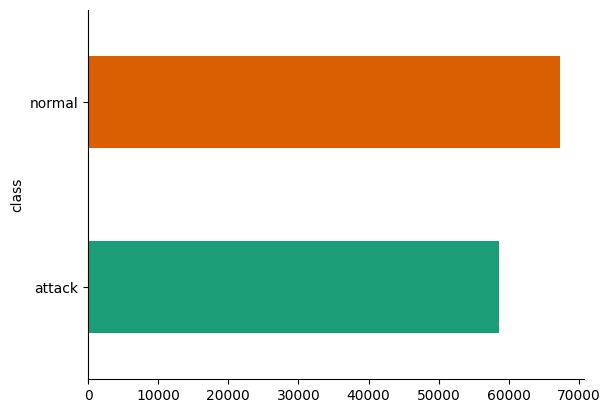

In [ ]:
train_dataframe.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

From the visualization above, the labels for the KDD dataset are a bit balanced, with about 60000 samples of the attack class, and close to 70000 for the normal class

In [ ]:
train_dataframe.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

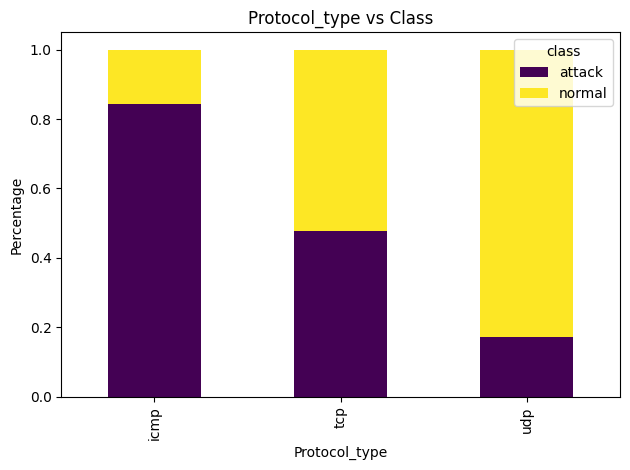

In [ ]:
# Visualize to see the effect of each object column on the target labels
column_to_visualize = 'protocol_type'

target_variable = 'class'

# Count values for each category and the target
count_df = train_dataframe.groupby([column_to_visualize, target_variable]).size().unstack()
count_df = count_df.div(count_df.sum(axis=1), axis=0)  # Convert to percentage

# Plot
ax = count_df.plot(kind='bar', stacked=True, colormap='viridis')
ax.set_title(f"{column_to_visualize.capitalize()} vs {target_variable.capitalize()}")
ax.set_ylabel("Percentage")
ax.set_xlabel(column_to_visualize.capitalize())

plt.tight_layout()
plt.show()

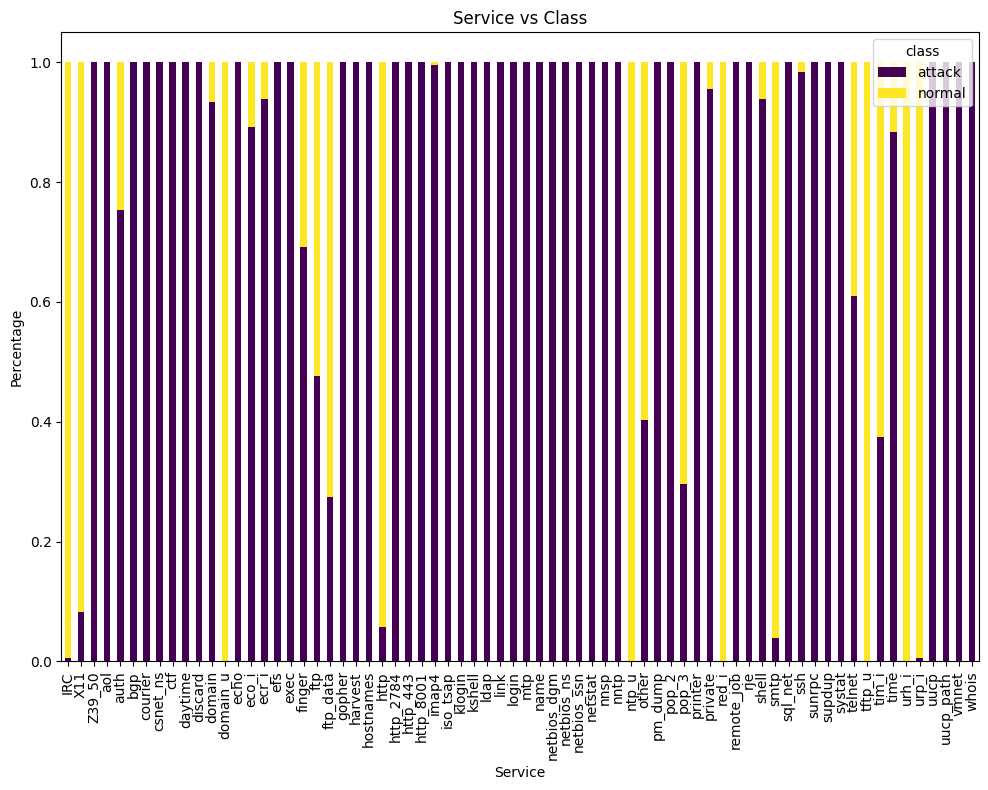

In [ ]:
# Visualize to see the effect of each object column on the target labels
column_to_visualize = 'service'

target_variable = 'class'

# Count values for each category and the target
count_df = train_dataframe.groupby([column_to_visualize, target_variable]).size().unstack()
count_df = count_df.div(count_df.sum(axis=1), axis=0)  # Convert to percentage

# Plot
ax = count_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))
ax.set_title(f"{column_to_visualize.capitalize()} vs {target_variable.capitalize()}")
ax.set_ylabel("Percentage")
ax.set_xlabel(column_to_visualize.capitalize())

plt.tight_layout()
plt.show()

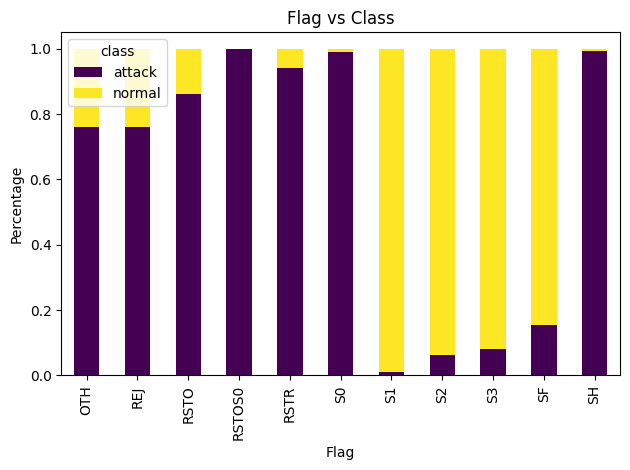

In [ ]:
# Visualize to see the effect of each object column on the target labels
column_to_visualize = 'flag'

target_variable = 'class'

# Count values for each category and the target
count_df = train_dataframe.groupby([column_to_visualize, target_variable]).size().unstack()
count_df = count_df.div(count_df.sum(axis=1), axis=0)  # Convert to percentage

# Plot
ax = count_df.plot(kind='bar', stacked=True, colormap='viridis')
ax.set_title(f"{column_to_visualize.capitalize()} vs {target_variable.capitalize()}")
ax.set_ylabel("Percentage")
ax.set_xlabel(column_to_visualize.capitalize())

plt.tight_layout()
plt.show()

Since the 3 object columns have significant impact on the target, they would be one-hot encoded, and not dropped

In [ ]:
train_dataframe.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,attack,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,attack,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [ ]:
np.unique(train_dataframe['class'])

array(['attack', 'normal'], dtype=object)

## Data Prepocessing:
> Label Encoding

> Shuffle Dataset & Split Dataset into Features and Labels

> One Hot Encoding of Categorical Features

> Splitt features and labels, into testing and training splits

> Standardize dataset

> Convert the features and Labels into Tensors, with data type as int64

In [ ]:
train_dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attack,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,attack,21


### Label Encoding

In [ ]:
# Convert Labels into Numerical Representation(0 & 1)
train_dataframe.loc[train_dataframe['class'] == 'normal', "class"] = 1
train_dataframe.loc[train_dataframe['class'] == 'attack', "class"] = 0

### Split Dataset into Features and Labels

In [ ]:
## Split Dataset in Features and Labels, and drop the Class feature
train_dataframe_shuffle = train_dataframe.sample(frac=1, random_state=42)

features = train_dataframe_shuffle.drop(['class', 'level'], axis=1)
labels = train_dataframe_shuffle['class']

### Perform One Hot Encoding on Categorical Features (Service, Flag, and Protocol-type)

In [ ]:
# One hot encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
categorical_columns = features.select_dtypes(['category', object]).columns

# Fit-transform the data
ohe.fit(features[categorical_columns])
dummies = pd.DataFrame(ohe.transform(features[categorical_columns]).toarray(),
                       index=features.index,
                       dtype=int)

# Get the column names after one hot encoding
encoded_columns = ohe.get_feature_names_out(categorical_columns)

# Assign the encoded column names
dummies.columns = encoded_columns

# Combine the encoded DataFrame with the original DataFrame
train_df_ohe = pd.concat([features.drop(categorical_columns, axis=1), dummies], axis=1)
train_df_ohe.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
47559,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119105,0,245,253,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
74411,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
68224,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Print one_hot_encoded categorical_columns for the testing phase
ohe.categories_

[array(['icmp', 'tcp', 'udp'], dtype=object),
 array(['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier',
        'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u',
        'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp',
        'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784',
        'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell',
        'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
        'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
       dtype=object),
 array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH'], dtype=object)]

### Train Test Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_df_ohe, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((100777, 122), (100777,), (25195, 122), (25195,))

### Standardization

In [ ]:
scaler = StandardScaler()

# Fit and Transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_val_scaled = scaler.transform(X_val)

# Save Scaler For Testing Phase
joblib.dump(scaler, _save_model_dir+'Scaler.pkl')

['/content/drive/MyDrive/Colab Notebooks/Netwok Intrusion Detection/Models/Scaler.pkl']

In [ ]:
X_train_scaled

array([[-0.1097468 , -0.00836434, -0.00537855, ..., -0.01967595,
        -1.21104869, -0.04623834],
       [-0.1097468 , -0.00836434, -0.00537855, ..., -0.01967595,
        -1.21104869, -0.04623834],
       [-0.1097468 , -0.00834834, -0.00534607, ..., -0.01967595,
         0.82573063, -0.04623834],
       ...,
       [-0.1097468 , -0.00836434, -0.00537855, ..., -0.01967595,
        -1.21104869, -0.04623834],
       [-0.1097468 , -0.00638605, -0.00537855, ..., -0.01967595,
         0.82573063, -0.04623834],
       [-0.1097468 , -0.00836434, -0.00537855, ..., -0.01967595,
        -1.21104869, -0.04623834]])

### Convert Dataset to Tensor

In [ ]:
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.int64)
X_val_tensor = tf.convert_to_tensor(X_val_scaled, dtype=tf.int64)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.int64)

X_train_tensor.shape, X_val_tensor.shape, y_train_tensor.shape, y_val_tensor.shape

(TensorShape([100777, 122]),
 TensorShape([25195, 122]),
 TensorShape([100777]),
 TensorShape([25195]))

## Modelling

### DNN Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1:]),
                          kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=tf.keras.regularizers.L2(1e-4),
                          activity_regularizer=tf.keras.regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=tf.keras.regularizers.L2(1e-4),
                          activity_regularizer=tf.keras.regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=tf.keras.regularizers.L2(1e-4),
                          activity_regularizer=tf.keras.regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=tf.keras.regularizers.L2(1e-4),
                          activity_regularizer=tf.keras.regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.AUC()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7872      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [ ]:
save_model_ckpt = tf.keras.callbacks.ModelCheckpoint(filepath=_save_model_dir+'DNN_Model', save_best_only=True, verbose=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

DNN_history = model.fit(X_train_tensor,
                        y_train_tensor,
                        steps_per_epoch = len(X_train_tensor)//64,
                        validation_data=(X_val_tensor, y_val_tensor),
                        epochs=100,
                        batch_size=32,
                        callbacks = [save_model_ckpt, early_stopping])

Epoch 1/100
1571/1574 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9618 - auc: 0.9895
Epoch 1: val_loss improved from inf to 0.13087, saving model to /content/drive/MyDrive/Colab Notebooks/Netwok Intrusion Detection/Models/DNN_Model
1574/1574 [==============================] - 19s 11ms/step - loss: 0.2146 - accuracy: 0.9618 - auc: 0.9895 - val_loss: 0.1309 - val_accuracy: 0.9785 - val_auc: 0.9962
Epoch 2/100
1567/1574 [============================>.] - ETA: 0s - loss: 0.1235 - accuracy: 0.9750 - auc: 0.9955
Epoch 2: val_loss improved from 0.13087 to 0.09138, saving model to /content/drive/MyDrive/Colab Notebooks/Netwok Intrusion Detection/Models/DNN_Model
1574/1574 [==============================] - 16s 10ms/step - loss: 0.1235 - accuracy: 0.9750 - auc: 0.9955 - val_loss: 0.0914 - val_accuracy: 0.9809 - val_auc: 0.9975
Epoch 3/100
1573/1574 [============================>.] - ETA: 0s - loss: 0.0954 - accuracy: 0.9779 - auc: 0.9958
Epoch 3: val_loss improved fr

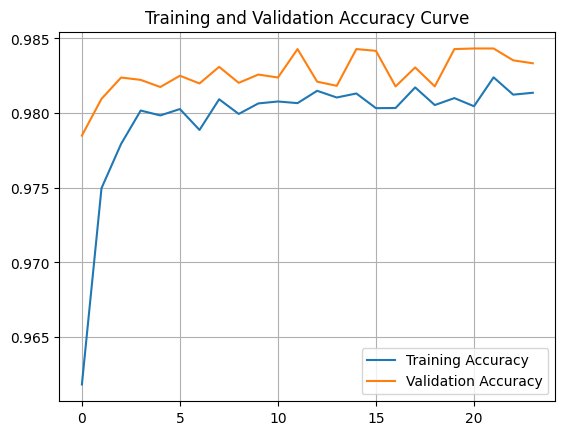

In [ ]:
# Plot Model Traning History
plt.plot(DNN_history.epoch, DNN_history.history['accuracy'], label='Training Accuracy')
plt.plot(DNN_history.epoch, DNN_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curve')
plt.legend()
plt.grid()
plt.savefig(_save_plot_dir+'DNN_Plots/Training_History_Accuracy_Curve')

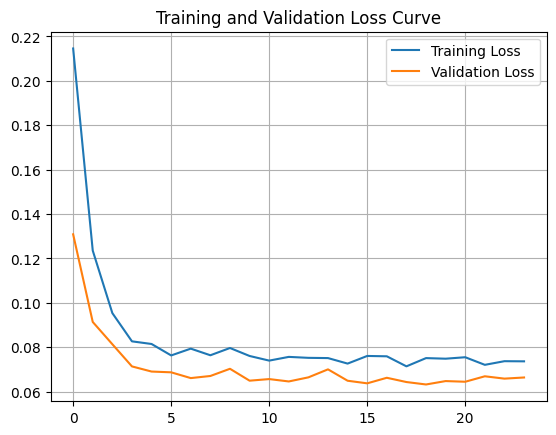

In [ ]:
# Plot Model Traning History
plt.plot(DNN_history.epoch, DNN_history.history['loss'], label='Training Loss')
plt.plot(DNN_history.epoch, DNN_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.grid()
plt.savefig(_save_plot_dir+'/DNN_Plots/Training_History_Loss_Curve')

### Logistic Regression

In [ ]:
logreg_clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(verbose=True)
)

logreg_clf.fit(X_train, y_train.astype(int))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(verbose=True))])

In [ ]:
logreg_clf.score(X_val, y_val.astype(int))

0.9734471125223259

In [ ]:
joblib.dump(logreg_clf, _save_model_dir+'/LogisticRegression.pkl')

['/content/drive/MyDrive/Colab Notebooks/Netwok Intrusion Detection/Models//LogisticRegression.pkl']

### Random Forest

In [ ]:
rand_clf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(verbose=True)
)

rand_clf.fit(X_train, y_train.astype(int))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    9.3s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(verbose=True))])

In [ ]:
rand_clf.score(X_val, y_val.astype(int))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


0.9991665012899384

In [ ]:
joblib.dump(rand_clf, _save_model_dir+'/RandomForestClassifier.pkl')

['/content/drive/MyDrive/Colab Notebooks/Netwok Intrusion Detection/Models//RandomForestClassifier.pkl']

### KNN

In [ ]:
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

knn_model.fit(X_train, y_train.astype(int))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
knn_model.score(X_val, y_val.astype(int))

0.9966660051597539

In [ ]:
joblib.dump(rand_clf, _save_model_dir+'/knnclassifier.pkl')

['/content/drive/MyDrive/Colab Notebooks/Netwok Intrusion Detection/Models//knnclassifier.pkl']

## Model Evaluation

In [ ]:
dnn_model = tf.keras.models.load_model(_save_model_dir+'DNN_Model')
logreg_model = joblib.load(_save_model_dir+'/LogisticRegression.pkl')
rand_model = joblib.load(_save_model_dir+'/RandomForestClassifier.pkl')
knn_model = joblib.load(_save_model_dir+'/knnclassifier.pkl')

dnn_model_pred = tf.round(dnn_model.predict(X_val_tensor))
logreg_model_pred = tf.round(logreg_model.predict(X_val))
rand_model_pred = tf.round(rand_model.predict(X_val))
knn_model_pred = tf.round(knn_model.predict(X_val))

788/788 [==============================] - 2s 2ms/step


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


In [ ]:
def plot_classification_report(y_true, y_pred, save_filepath, model_name):
  report = classification_report(y_true, y_pred, output_dict=True)
  report_str = classification_report(y_true, y_pred)

  # Convert the report to a figure
  fig, ax = plt.subplots(figsize=(5, 3))
  ax.text(0.0, 1.0, report_str, fontsize=12, va='top', ha='left', family='monospace')
  ax.set_title(f'{model_name} Classification Report');
  ax.axis('off');

  # Save the figure as an image file
  plt.savefig(save_filepath, bbox_inches='tight')
  plt.show()

def plot_confusion_matrix(y_true, y_pred, save_filepath, model_name):
  cm = metrics.confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
  ax.set_title(f'{model_name} Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Labels')

  plt.savefig(save_filepath, bbox_inches='tight')
  plt.show()

def plot_roc_auc_curve(y_true, y_pred, save_filepath, model_name):
  fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
  roc_auc = metrics.auc(fpr, tpr)

  fig, ax = plt.subplots(figsize=(10, 8))

  ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')

  # Adding grid
  ax.grid(True, linestyle='--', linewidth=0.5)

  # Adding annotations for thresholds
  for i in np.linspace(0, len(thresholds) - 1, num=10, dtype=int):
      ax.annotate(f'{thresholds[i]:.2f}',
                  (fpr[i], tpr[i]),
                  textcoords="offset points",
                  xytext=(10, -10),
                  ha='center',
                  fontsize=8,
                  color='black',
                  bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.05])

  ax.set_title(f'{model_name} ROC Curve', fontsize=16)
  ax.set_xlabel('False Positive Rate', fontsize=14)
  ax.set_ylabel('True Positive Rate', fontsize=14)

  ax.legend(loc='lower right', fontsize=12)

  plt.savefig(save_filepath, bbox_inches='tight', dpi=300)
  plt.show()

### Dnn Model

In [ ]:
print(classification_report(y_val_tensor, dnn_model_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11706
           1       0.97      1.00      0.98     13489

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195



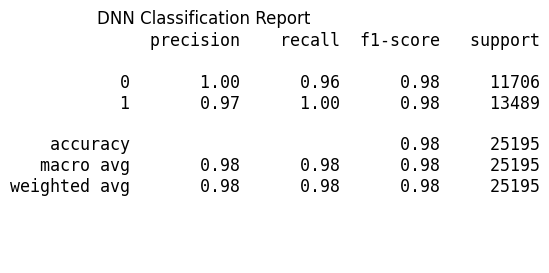

In [ ]:
plot_classification_report(y_val.astype(int), dnn_model_pred, save_filepath=_save_plot_dir+'DNN_Plots/ClassificationReport.png',model_name='DNN')

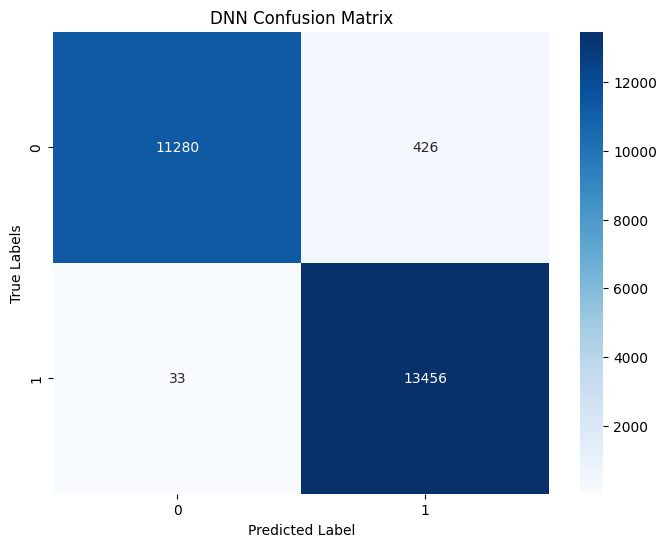

In [ ]:
plot_confusion_matrix(y_val.astype(int), dnn_model_pred, save_filepath=_save_plot_dir+'DNN_Plots/confusion_matrix.png', model_name='DNN')

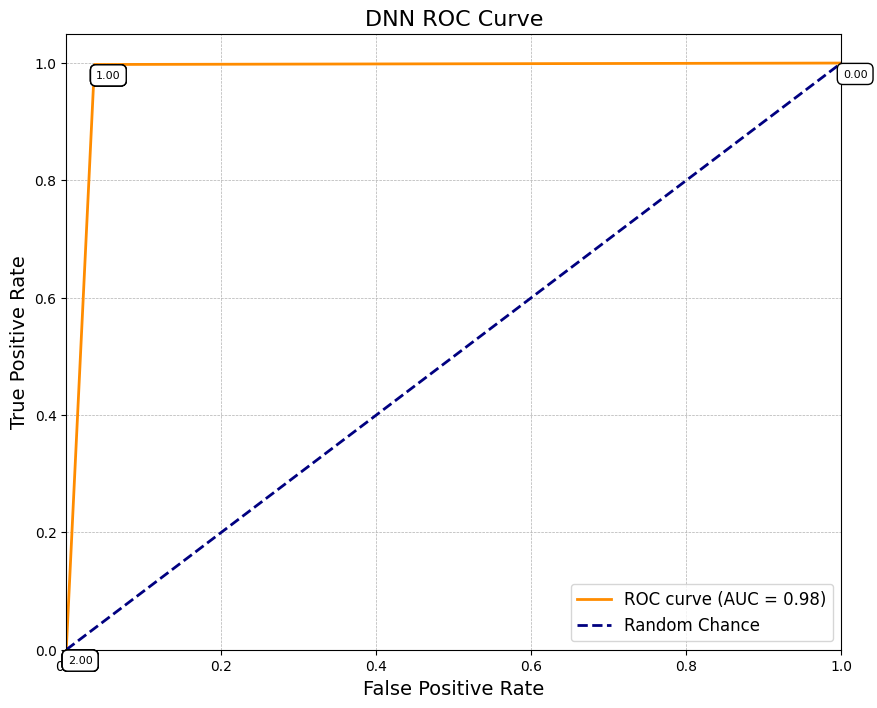

In [ ]:
plot_roc_auc_curve(y_val.astype(int), dnn_model_pred, save_filepath=_save_plot_dir+'DNN_Plots/roc_auc_score.png', model_name='DNN')

### Logistic Regression Model

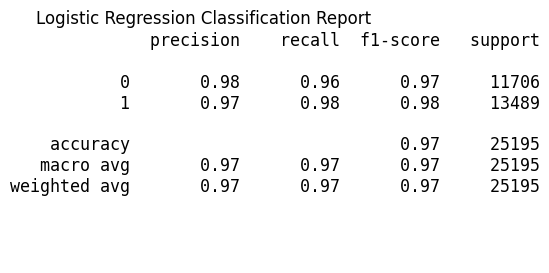

In [ ]:
plot_classification_report(y_val.astype(int), logreg_model_pred, save_filepath=_save_plot_dir+'LogRegression/ClassificationReport', model_name='Logistic Regression')

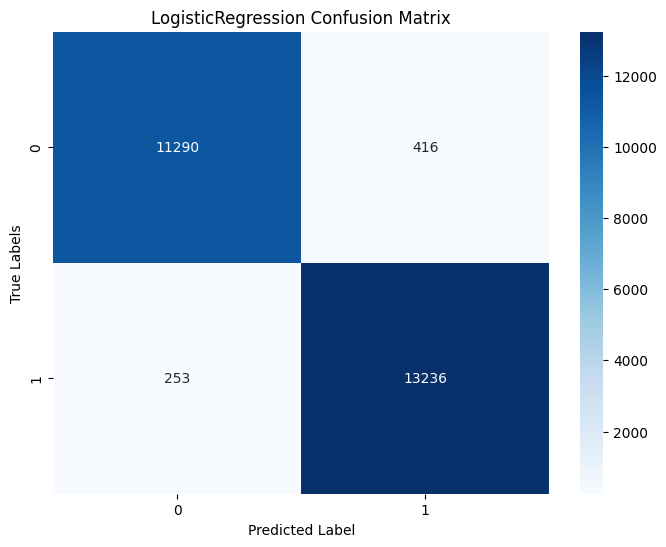

In [ ]:
plot_confusion_matrix(y_val.astype(int), logreg_model_pred, save_filepath=_save_plot_dir+'LogRegression/ConfusionMatrix.png', model_name='LogisticRegression')

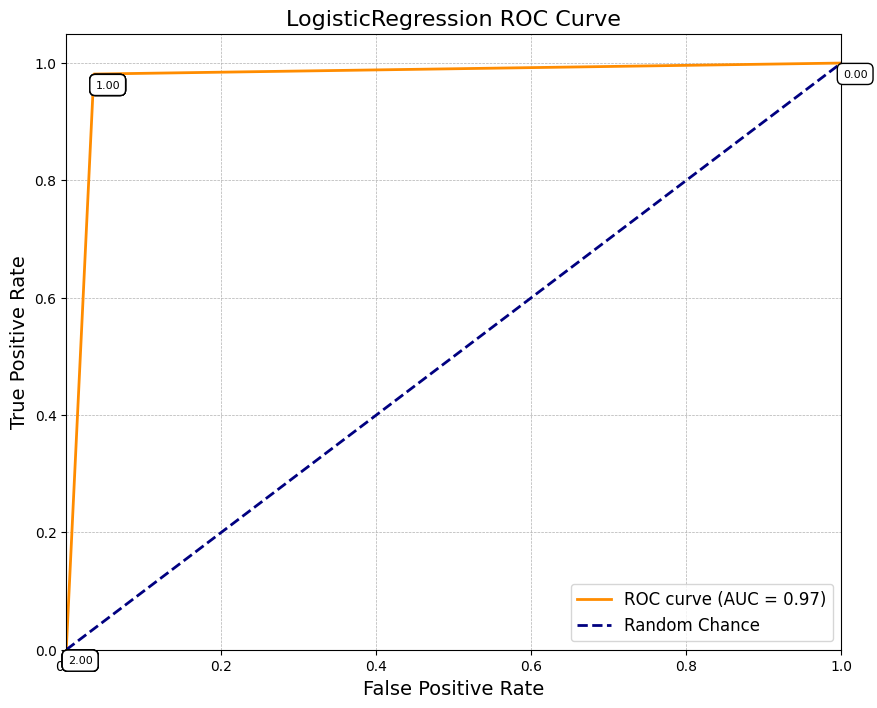

In [ ]:
plot_roc_auc_curve(y_val.astype(int), logreg_model_pred, save_filepath=_save_plot_dir+'LogRegression/roc_auc_curve.png', model_name='LogisticRegression')

### Random Forest Model

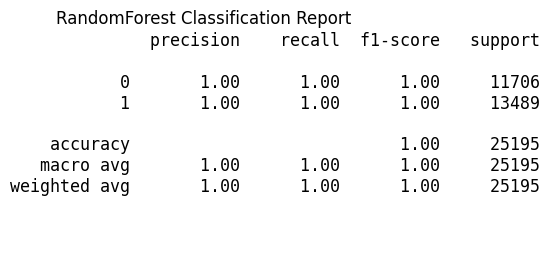

In [ ]:
plot_classification_report(y_val.astype(int), rand_model_pred, save_filepath=_save_plot_dir+'RandomForests/ClassificationReport.png', model_name='RandomForest')

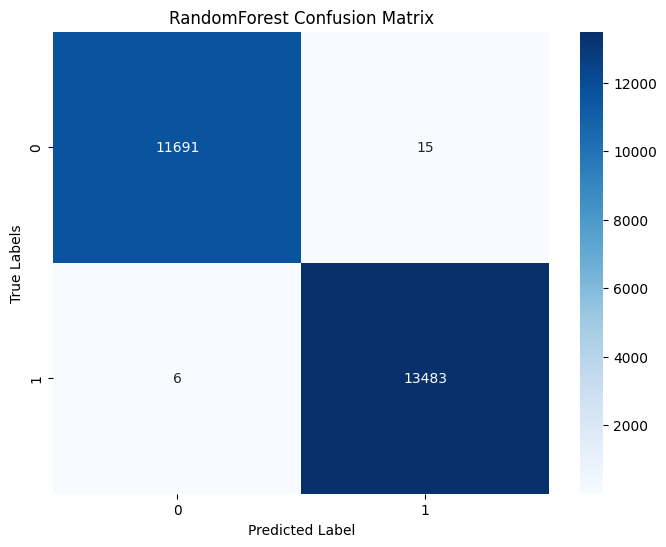

In [ ]:
plot_confusion_matrix(y_val.astype(int), rand_model_pred, save_filepath=_save_plot_dir+'RandomForests/confusionmatrix.png', model_name='RandomForest')

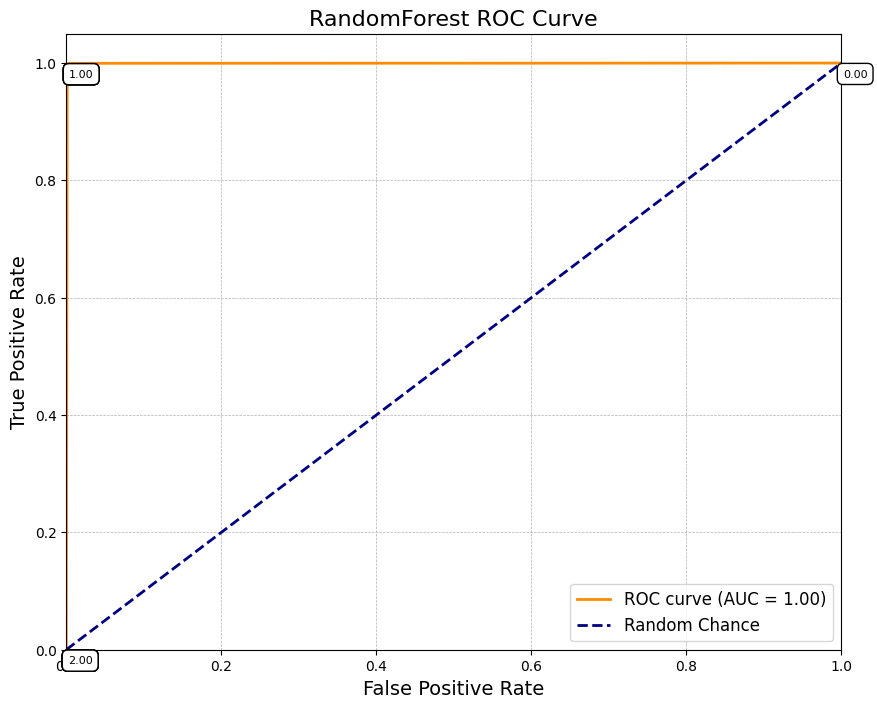

In [ ]:
plot_roc_auc_curve(y_val.astype(int), rand_model_pred, save_filepath=_save_plot_dir+'RandomForests/roc_auc_score.png', model_name='RandomForest')

### KNN Model

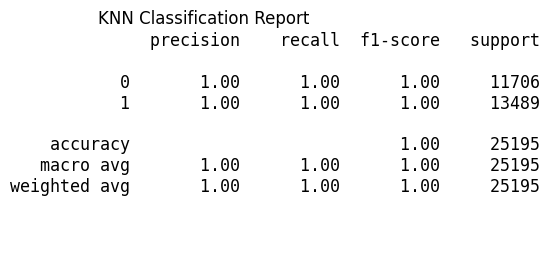

In [ ]:
plot_classification_report(y_val.astype(int), knn_model_pred, save_filepath=_save_plot_dir+'KNN_Model/ClassificationReport', model_name='KNN')

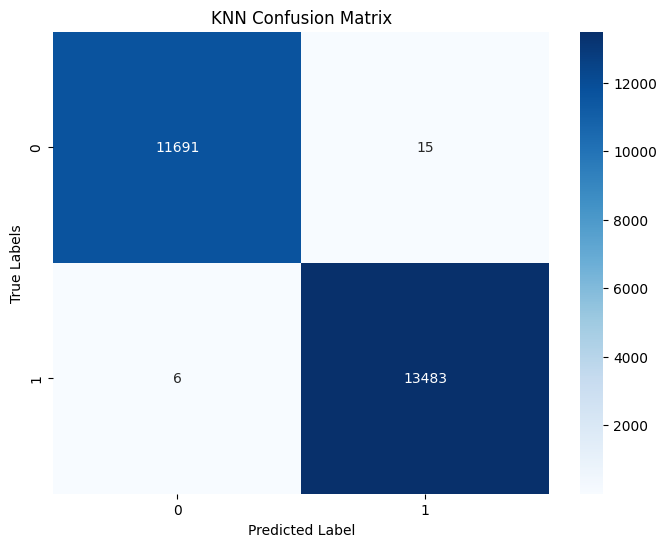

In [ ]:
plot_confusion_matrix(y_val.astype(int), knn_model_pred, save_filepath=_save_plot_dir+'KNN_Model/confusionmatrix.png', model_name='KNN')

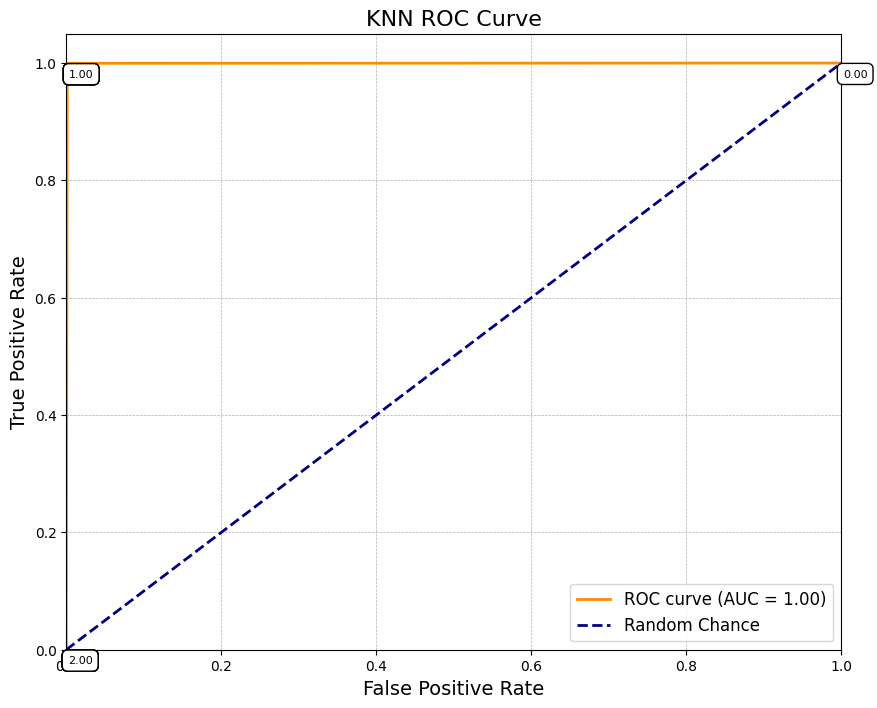

In [ ]:
plot_roc_auc_curve(y_val.astype(int), knn_model_pred, save_filepath=_save_plot_dir+'KNN_Model/roc_auc_score.png',model_name='KNN')

### Model Comparison

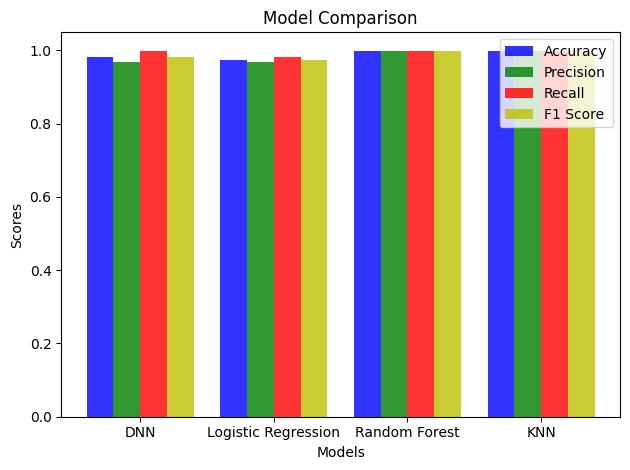

In [ ]:
def evaluate_and_plot_models(y_true, y_pred_dict):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Initialize lists to store metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Calculate metrics for each model
    for model_name, y_pred in y_pred_dict.items():
        accuracy.append(accuracy_score(y_true, y_pred))
        precision.append(precision_score(y_true, y_pred))
        recall.append(recall_score(y_true, y_pred))
        f1.append(f1_score(y_true, y_pred))

    # Plot the metrics
    x = range(len(y_pred_dict))
    bar_width = 0.2
    opacity = 0.8

    fig, ax = plt.subplots()

    rects1 = ax.bar([p - bar_width*1.5 for p in x], accuracy, bar_width,
                    alpha=opacity, color='b', label='Accuracy')

    rects2 = ax.bar([p - bar_width*0.5 for p in x], precision, bar_width,
                    alpha=opacity, color='g', label='Precision')

    rects3 = ax.bar([p + bar_width*0.5 for p in x], recall, bar_width,
                    alpha=opacity, color='r', label='Recall')

    rects4 = ax.bar([p + bar_width*1.5 for p in x], f1, bar_width,
                    alpha=opacity, color='y', label='F1 Score')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Model Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(y_pred_dict.keys())
    ax.legend()

    plt.tight_layout()
    plt.show()


y_true = y_val.astype(int)
y_pred_dict = {
    'DNN': dnn_model_pred,
    'Logistic Regression': logreg_model_pred,
    'Random Forest': rand_model_pred,
    'KNN': knn_model_pred
}

evaluate_and_plot_models(y_true, y_pred_dict)

## Detect Network Intrusion on a Network Packet

In [ ]:
class Network_Intrusion:
  @staticmethod
  def preprocess_network_packet(test_features, scaler_path):
    columns =['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
        'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
        'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
        'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
        'num_access_files', 'num_outbound_cmds', 'is_host_login',
        'is_guest_login', 'count', 'srv_count', 'serror_rate',
        'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
        'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
        'dst_host_srv_count', 'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate']

    test_features_df = pd.DataFrame([test_features], columns=columns)

    categorical_columns = ['protocol_type', 'service', 'flag']

    ohe2 = OneHotEncoder(categories=ohe.categories_)
    one_hot_features = ohe2.fit_transform(test_features_df[categorical_columns]).toarray()

    dummies = pd.DataFrame(one_hot_features,
                          index=test_features_df.index,
                          dtype=int)
    encoded_columns = ohe2.get_feature_names_out(categorical_columns)
    dummies.columns = encoded_columns
    test_dataframe = pd.concat([test_features_df.drop(categorical_columns, axis=1), dummies], axis=1)
    scaler = joblib.load(scaler_path)
    scaled_features = scaler.transform(test_dataframe)
    test_dataframe_tensor = tf.convert_to_tensor(test_dataframe, dtype='int64')
    return test_dataframe_tensor

  @staticmethod
  def detect(packet, model):
    pred = model.predict(packet)
    pred = np.round(pred[0])[0].astype('int32')
    class_names = ['attack', 'normal']
    pred_label = class_names[pred]
    return pred_label

In [ ]:
packet = Network_Intrusion.preprocess_network_packet([0,'tcp','http','SF',213,659,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,24,24,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00], _path_to_scaler)
pd.DataFrame(packet)

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0,213,659,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
model = tf.keras.models.load_model(_save_model_dir+'DNN_Model')

In [ ]:
Network_Intrusion.detect(packet, model)

1/1 [==============================] - 0s 216ms/step


'attack'

## Testing the model on a User Interface

In [4]:
!pip install --upgrade streamlit
!pip install --upgrade py-localtunnel

In [5]:
!wget -q -O - ipv4.icanhazip.com

34.80.50.178


In [ ]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 3s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [ ]:
!streamlit run network_intrusion_detection_UI.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.50.178:8501

your url is: https://four-chairs-carry.loca.lt
2024-07-24 11:50:34.276858: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 11:50:34.276913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 11:50:34.278428: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-24 11:50:35.709431: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/pyth

In [ ]:
# 0,tcp,private, REJ, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 222, 18, 0.0, 0.0, 1.0, 1.0, 0.08, 0.06, 0.0, 255.0, 18.0, 0.07, 0.07, 0.0, 0.0, 0.0, 0.0, 1.00, 1.0

In [ ]:
# 0, udp, private, SF, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 5, 5, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 255.0, 255.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.00, 0.0